In [1]:
cd tfupgraded_src

/Users/gvsi/Downloads/nn_compsensing/tfupgraded_src


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
import tensorflow as tf
import glob
import os
import sys

%matplotlib inline

import dcgan_model
import dcgan_utils
import dcgan_ops
import celebA_estimators

### Read image and resize it

In [9]:
os.getcwd()

'/Users/gvsi/Downloads/nn_compsensing/tfupgraded_src'

In [10]:
# read x_1 image
img = tf.cast(tf.constant(dcgan_utils.get_image("/Users/gvsi/Developer/DataScience/lab7/img7.jpg", 800)),tf.float32)

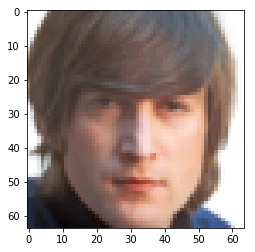

In [11]:
with tf.Session() as sess:
    tmp = sess.run(img)
    
    plt.imshow(dcgan_utils.inverse_transform(tmp))
    sess.close()

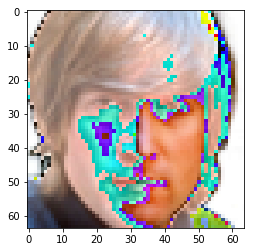

In [12]:
plt.imshow(tmp)

### Set up the environment

In [13]:
sess = tf.Session()

# Generate z_1    
z_1 = tf.Variable(np.random.randn(1,100), name='z_1', dtype=tf.float32)

# Call the function with z_1
x_hat, restore_dict, restore_path = celebA_estimators.dcgan_gen(z_1, sess)

restorer = tf.train.Saver(var_list=restore_dict)
restorer.restore(sess, restore_path)

# Reshape x_1 and x_hat[0,:] to (1,12288)
x_1 = tf.reshape(img, [1, -1]);
gen = tf.reshape(x_hat[0, :], [1, -1]);

# Squared loss function of z_1 and x_1
l2diff = tf.sqrt( tf.reduce_sum(tf.square(tf.subtract(gen, x_1))))

# Gradient descent over z_1

In [14]:
# define optimizer
optimizer = tf.train.GradientDescentOptimizer(0.01)
train = optimizer.minimize(l2diff, var_list=[z_1], name='train_op')

init = tf.global_variables_initializer()

In [15]:
sess.run(init)

restorer = tf.train.Saver(var_list=restore_dict)
restorer.restore(sess, restore_path)

# Run gradient descent
print("starting at", "z_1:", "l2diff:", sess.run(l2diff))
for step in range(1000):
    sess.run(train)
    if step % 50 ==0:
        print("step", step, " l2diff:", sess.run(l2diff))

('starting at', 'z_1:', 'l2diff:', 75.864304)
('step', 0, ' l2diff:', 74.394905)
('step', 50, ' l2diff:', 49.401726)
('step', 100, ' l2diff:', 45.201069)
('step', 150, ' l2diff:', 40.563847)
('step', 200, ' l2diff:', 37.006371)
('step', 250, ' l2diff:', 33.639023)
('step', 300, ' l2diff:', 32.127075)
('step', 350, ' l2diff:', 31.190411)
('step', 400, ' l2diff:', 30.56768)
('step', 450, ' l2diff:', 29.969791)
('step', 500, ' l2diff:', 29.358297)
('step', 550, ' l2diff:', 28.92952)
('step', 600, ' l2diff:', 28.406668)
('step', 650, ' l2diff:', 27.946857)
('step', 700, ' l2diff:', 27.403702)
('step', 750, ' l2diff:', 27.082613)
('step', 800, ' l2diff:', 26.642958)
('step', 850, ' l2diff:', 26.32246)
('step', 900, ' l2diff:', 26.064865)
('step', 950, ' l2diff:', 25.783514)


### Generate image with z_hat

In [16]:
z_1_hat = sess.run(z_1)

# Generate image with trained z_hat
z = tf.placeholder(tf.float32, shape=[1, 100], name = 'z')
x_hat, restore_dict, restore_path = celebA_estimators.dcgan_gen(z, sess)

# load variables
restorer = tf.train.Saver(var_list=restore_dict)
restorer.restore(sess, restore_path)

x_hat_val = sess.run(x_hat, feed_dict={z : z_1_hat})

# Verify that l2diff error is the same
generated_image_vec=x_hat_val[0, :].reshape([1, -1])
l2diff2 = tf.sqrt( tf.reduce_sum(tf.square(tf.subtract(generated_image_vec, x_1))))
print("l2diff(G(z_1_hat), x_1):", sess.run(l2diff2))

sess.close()

('l2diff(G(z_1_hat), x_1):', 25.561563)


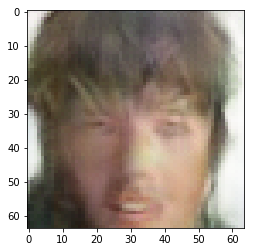

In [17]:
# display image
plt.imshow(dcgan_utils.inverse_transform(x_hat_val[0, :]))

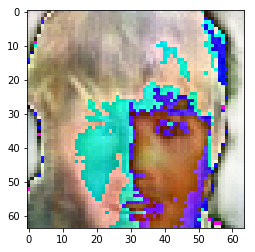

In [18]:
plt.imshow(x_hat_val[im_idx, :])

# 4.

### Generate a second image

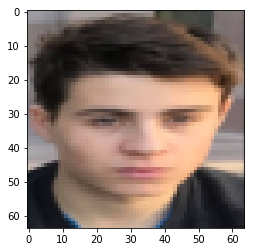

In [19]:
# read x_1 image
img = tf.cast(tf.constant(dcgan_utils.get_image("/Users/gvsi/Developer/DataScience/lab7/img4.jpg", 5000)),tf.float32)

with tf.Session() as sess:
    tmp = sess.run(img)
    
    plt.imshow(dcgan_utils.inverse_transform(tmp))
    sess.close()

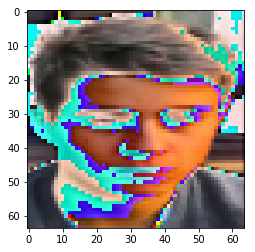

In [20]:
plt.imshow(tmp)

In [21]:
sess = tf.Session()

# Generate z_1    
z_1 = tf.Variable(np.random.randn(1,100), name='z_1', dtype=tf.float32)

# Call the function with z_1
x_hat, restore_dict, restore_path = celebA_estimators.dcgan_gen(z_1, sess)

restorer = tf.train.Saver(var_list=restore_dict)
restorer.restore(sess, restore_path)

# Reshape x_1 and x_hat[0,:] to (1,12288)
x_1 = tf.reshape(img, [1, -1]);
gen = tf.reshape(x_hat[0, :], [1, -1]);

# Squared loss function of z_1 and x_1
l2diff = tf.sqrt( tf.reduce_sum(tf.square(tf.subtract(gen, x_1))))

# define optimizer
optimizer = tf.train.GradientDescentOptimizer(0.01)
train = optimizer.minimize(l2diff, var_list=[z_1], name='train_op')

init = tf.global_variables_initializer()

sess.run(init)

restorer = tf.train.Saver(var_list=restore_dict)
restorer.restore(sess, restore_path)

# Run gradient descent
print("starting at", "z_1:", "l2diff:", sess.run(l2diff))
for step in range(500):
    sess.run(train)
    if step % 50 ==0:
        print("step", step, " l2diff:", sess.run(l2diff))

('starting at', 'z_1:', 'l2diff:', 67.158607)
('step', 0, ' l2diff:', 66.110794)
('step', 50, ' l2diff:', 50.962803)
('step', 100, ' l2diff:', 48.248146)
('step', 150, ' l2diff:', 46.020626)
('step', 200, ' l2diff:', 44.118599)
('step', 250, ' l2diff:', 42.445892)
('step', 300, ' l2diff:', 41.215816)
('step', 350, ' l2diff:', 39.752693)
('step', 400, ' l2diff:', 36.407578)
('step', 450, ' l2diff:', 35.164246)


In [22]:
z_2_hat = sess.run(z_1)

# Generate image with trained z_hat
# z = tf.placeholder(tf.float32, shape=[1, 100], name = 'z')
# x_hat, restore_dict, restore_path = celebA_estimators.dcgan_gen(z, sess)

# load variables
restorer = tf.train.Saver(var_list=restore_dict)
restorer.restore(sess, restore_path)

x_hat_val = sess.run(x_hat, feed_dict={z : z_2_hat})

# Verify that l2diff error is the same
generated_image_vec=x_hat_val[0, :].reshape([1, -1])
l2diff2 = tf.sqrt( tf.reduce_sum(tf.square(tf.subtract(generated_image_vec, x_1))))
print("l2diff(G(z_hat), x_1):", sess.run(l2diff2))

('l2diff(G(z_hat), x_1):', 34.662674)


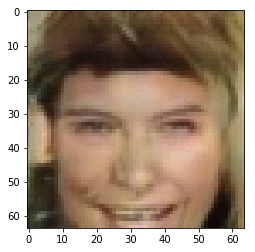

In [23]:
# display image
plt.imshow(dcgan_utils.inverse_transform(x_hat_val[0, :]))

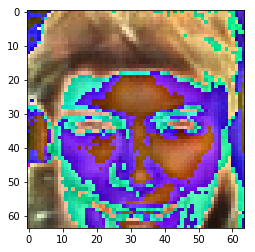

In [24]:
plt.imshow(x_hat_val[im_idx, :])

### Combine images

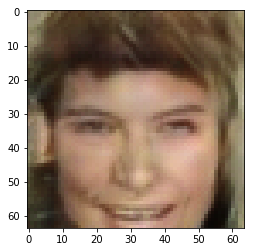

In [26]:
lambd = 0.1

z_comb = lambd * z_1_hat + (1-lambd) * z_2_hat

z = tf.placeholder(tf.float32, shape=[1, 100], name = 'z')
x_hat, restore_dict, restore_path = celebA_estimators.dcgan_gen(z, sess)

restorer = tf.train.Saver(var_list=restore_dict)
restorer.restore(sess, restore_path)

x_hat_val = sess.run(x_hat, feed_dict={z : z_comb})

# display image
plt.imshow(dcgan_utils.inverse_transform(x_hat_val[0, :]))

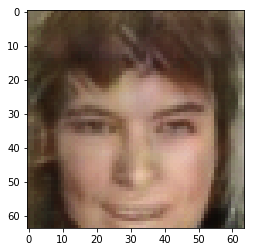

In [27]:
lambd = 0.3

z_comb = lambd * z_1_hat + (1-lambd) * z_2_hat

z = tf.placeholder(tf.float32, shape=[1, 100], name = 'z')
x_hat, restore_dict, restore_path = celebA_estimators.dcgan_gen(z, sess)

restorer = tf.train.Saver(var_list=restore_dict)
restorer.restore(sess, restore_path)

x_hat_val = sess.run(x_hat, feed_dict={z : z_comb})

# display image
plt.imshow(dcgan_utils.inverse_transform(x_hat_val[0, :]))

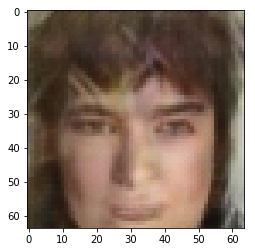

In [28]:
lambd = 0.5

z_comb = lambd * z_1_hat + (1-lambd) * z_2_hat

z = tf.placeholder(tf.float32, shape=[1, 100], name = 'z')
x_hat, restore_dict, restore_path = celebA_estimators.dcgan_gen(z, sess)

restorer = tf.train.Saver(var_list=restore_dict)
restorer.restore(sess, restore_path)

x_hat_val = sess.run(x_hat, feed_dict={z : z_comb})

# display image
plt.imshow(dcgan_utils.inverse_transform(x_hat_val[0, :]))

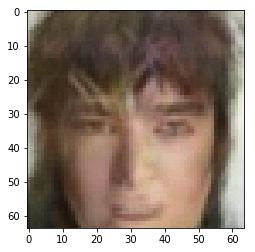

In [29]:
lambd = 0.7

z_comb = lambd * z_1_hat + (1-lambd) * z_2_hat

z = tf.placeholder(tf.float32, shape=[1, 100], name = 'z')
x_hat, restore_dict, restore_path = celebA_estimators.dcgan_gen(z, sess)

restorer = tf.train.Saver(var_list=restore_dict)
restorer.restore(sess, restore_path)

x_hat_val = sess.run(x_hat, feed_dict={z : z_comb})

# display image
plt.imshow(dcgan_utils.inverse_transform(x_hat_val[0, :]))

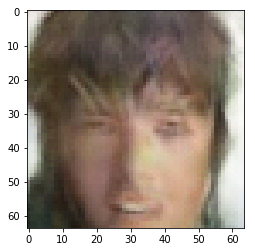

In [30]:
lambd = 0.9

z_comb = lambd * z_1_hat + (1-lambd) * z_2_hat

z = tf.placeholder(tf.float32, shape=[1, 100], name = 'z')
x_hat, restore_dict, restore_path = celebA_estimators.dcgan_gen(z, sess)

restorer = tf.train.Saver(var_list=restore_dict)
restorer.restore(sess, restore_path)

x_hat_val = sess.run(x_hat, feed_dict={z : z_comb})

# display image
plt.imshow(dcgan_utils.inverse_transform(x_hat_val[0, :]))